# **Tratamento do Dataframe**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

### Lendo o dataframe

In [2]:
df = pd.read_csv("dataframe/Hotel Reservations.csv")

In [3]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


### Buscando correlações entre o preço médio por quarto e as demais colunas

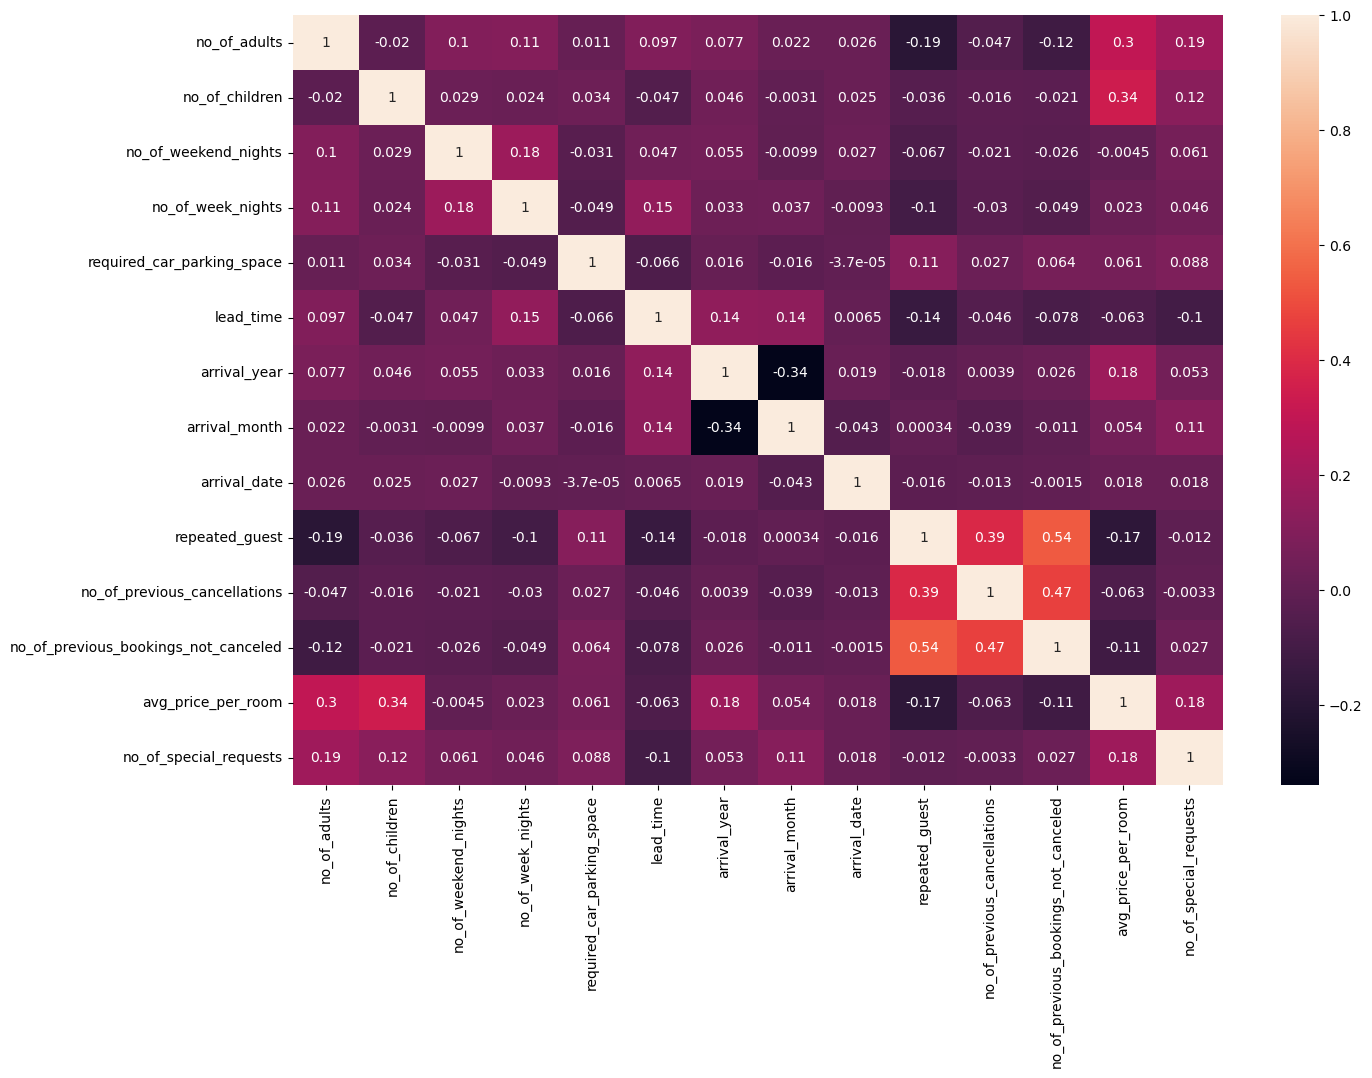

In [4]:
figura = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

### Excluindo as colunas com pouca/nenhuma correlação com o preço médio

In [5]:
df.drop(columns = ['Booking_ID', 'booking_status', 'repeated_guest','type_of_meal_plan',  'arrival_date', 'market_segment_type', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'], axis = 1, inplace = True)

In [6]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'room_type_reserved',
       'arrival_year', 'arrival_month', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

### Tratamento de variáveis categóricas / datas através de dummies (colunas binárias)

In [7]:
colunas = ['room_type_reserved', 'arrival_year', 'arrival_month']
df = pd.get_dummies(df, prefix = colunas, columns = colunas)

### Inserindo a coluna "label_avg_price_per_room" e relacionando-a com a coluna "avg_price_per_room"

In [8]:
def avg_set_labels(avg):
    if avg <= 85:
        return 0
    elif 85 < avg < 115:
        return 1
    else:
        return 2

In [9]:
df['label_avg_price_per_room'] = df['avg_price_per_room'].apply(avg_set_labels)
df['label_avg_price_per_room']

0        0
1        1
2        0
3        1
4        1
        ..
36270    2
36271    1
36272    1
36273    1
36274    2
Name: label_avg_price_per_room, Length: 36275, dtype: int64

### Exclusão da coluna "avg_price_per_room"

In [10]:
df.pop("avg_price_per_room")

0         65.00
1        106.68
2         60.00
3        100.00
4         94.50
          ...  
36270    167.80
36271     90.95
36272     98.39
36273     94.50
36274    161.67
Name: avg_price_per_room, Length: 36275, dtype: float64

### Reindexação da coluna "label_avg_price_per_room" para a primeira posição do dataframe

In [11]:
colunas = []
colunas.append('label_avg_price_per_room')
for i in range(len(df.columns[:-1])):
    colunas.append(df.columns[i])
df = df[colunas]
df

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,no_of_special_requests,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,...,arrival_month_3,arrival_month_4,arrival_month_5,arrival_month_6,arrival_month_7,arrival_month_8,arrival_month_9,arrival_month_10,arrival_month_11,arrival_month_12
0,0,2,0,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2,0,2,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,0,2,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2,3,0,2,6,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36271,1,2,0,1,3,0,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
36272,1,2,0,2,6,0,2,1,0,0,...,0,0,0,0,1,0,0,0,0,0
36273,1,2,0,0,3,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### Modelo salvo em csv

In [13]:
df.to_csv("dataframe/Hotel Reservations tratado.csv", index=False)